In [116]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
from pandas import DataFrame 
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords 
from nltk.tag import pos_tag
import sys
import unicodedata
from bs4 import BeautifulSoup

from konlpy.tag import Okt

In [117]:
from tqdm import tqdm_notebook
from gensim.models import Word2Vec

In [118]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iamsu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [119]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iamsu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [120]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\iamsu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [121]:
df = pd.read_csv("../크롤링/data/en/en_Omniscient Reader_episode_total.csv")

In [122]:
df = df[['Review']]

In [123]:
df.head()

,Review
0,This art is HONESTLY SPECTACULAR. Can't WAIT t...
1,IT'S HERE!!!
2,"If he read the story over ten years, I hope he..."
3,Yo this better become the next big action fant...
4,"DONT SLEEP ON THIS, THIS IS A TOP TIER MANHWA"


In [124]:
df.columns = ['Review']
df.head()

,Review
0,This art is HONESTLY SPECTACULAR. Can't WAIT t...
1,IT'S HERE!!!
2,"If he read the story over ten years, I hope he..."
3,Yo this better become the next big action fant...
4,"DONT SLEEP ON THIS, THIS IS A TOP TIER MANHWA"


# Okt 토큰화 및 불용어 제거

In [125]:
sentence = df['Review'][0]

okt = Okt()
okt.morphs(sentence,stem=True)

['This',
 'art',
 'is',
 'HONESTLY',
 'SPECTACULAR',
 '.',
 'Can',
 "'",
 't',
 'WAIT',
 'to',
 'see',
 'where',
 'this',
 'one',
 'goes',
 '!!']

In [133]:
def str_lower(input_str) : # str_lower 함수 정의
    result = re.sub(r"[^a-z0-9]+", " ", input_str.lower())
    return result

def get_tokenized_data(df):
    from eunjeon import Mecab
    """
    Okt 형태소 분석기를 이용하여 토큰화 및 불용어 제거하는 함수¶
    """

    # mecab 형태소 분석기 객체 생성 
    okt = Okt()
    #mecab = Mecab('C:/mecab/mecab-ko-dic')

    # 결과 리스트
    tokenized_data = []
    
#     stop_words = set(stopwords.words('english')) 
#     stop_words.update(['im'])    
#     print(stop_words[:10])

    # 원래 진행하고자했던 반복문 for i in range(100)에서 'in' 뒤에 문장을 tqdm()으로 감싸주면 진행 상황이 bar로 표현된다.
    # tqdm_notebook 은 tqdm 의 Jupiter Notebook version, progress bar가 예쁘다.
    for sentence in tqdm_notebook(df['Review']):
        #print(sentence)
        #tokenized_sentence = mecab.morphs(sentence) # mecab 문장 토큰화
        tokenized_sentence = okt.morphs(sentence,stem=True)  # okt 문장 토큰화
        
        # 불용어 제거 
        result = []
        for word in tokenized_sentence: 
            if word not in stop_words: 
                result.append(word) 
#         print('불용어 제거 전 :',tokenized_sentence) 
#         print('불용어 제거 후 :',result)        
       
         # 한글자 제거
        stopwords_removed_sentence = [word for word in result if len(word) > 1]
        
        # 구두점 제거, 소문자로 변환
        lowercased_sentence = [str_lower(string) for string in stopwords_removed_sentence] 

        tokenized_data.append(lowercased_sentence)
    
    return tokenized_data

In [134]:
def show_review_info(tokenized_data):
    """
    리뷰 길이 분포 확인 함수
    """
    print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
    print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
    plt.hist([len(review) for review in tokenized_data], bins=50)
    plt.xlabel('length of samples')
    plt.ylabel('number of samples')
    plt.show()

In [135]:
tokenized_data = get_tokenized_data(df)
tokenized_data[:10]

<ipython-input-133-387ff487e49a>:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sentence in tqdm_notebook(df['Review']):


  0%|          | 0/159351 [00:00<?, ?it/s]

[['this',
  'art',
  'honestly',
  'spectacular',
  'can',
  'wait',
  'see',
  'one',
  'goes',
  ' '],
 ['it', 'here', ' '],
 ['if',
  'read',
  'story',
  'ten',
  'years',
  'hope',
  'still',
  'remembers',
  'early',
  'stuff'],
 ['yo',
  'better',
  'become',
  'next',
  'big',
  'action',
  'fantasy',
  'series',
  'webtoon',
  'multiple',
  'languages',
  'everyone',
  'reading'],
 ['dont', 'sleep', 'on', 'this', 'this', 'is', 'top', 'tier', 'manhwa'],
 ['would',
  'read',
  '3 000',
  'episode',
  'webtoon',
  ' ',
  'okay',
  ' ',
  'edit',
  'omg',
  'noticed',
  'web',
  'novel',
  'thanks',
  'everyone',
  'telling'],
 ['this',
  'one',
  'popular',
  'korean',
  'webtoons',
  'and',
  'one',
  'legendary',
  'web',
  'novels',
  ' ',
  'everyone',
  'love'],
 ['simple', 'woman', 'saw', 'hot', 'guy', 'ad', 'here'],
 ['um', 'finish', 'gonna', 'happen', 'real', 'life', '0 0'],
 ['reminds', 'solo', 'leveling', ' ']]

리뷰의 최대 길이 : 118
리뷰의 평균 길이 : 8.559337562989878


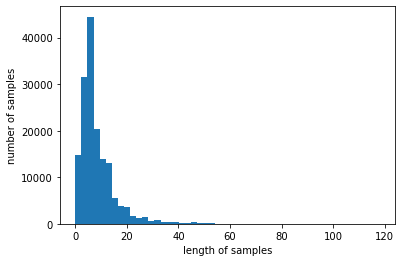

In [136]:
show_review_info(tokenized_data)

# NLTK 문장 토큰화 (Sentence Tokenization)

In [ ]:
# sen_text = sent_tokenize(review1)
# sen_text
# #34분 소요...
# sen_text = sent_tokenize(review)

# normalized_text = []
# for string in sen_text:
#      tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
#      normalized_text.append(tokens)
# # 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.

# result = []
# result = [word_tokenize(sentence) for sentence in normalized_text]
# # 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.

# print(result)

# stop_words = set(stopwords.words('english')) 
# stop_words.update(['im'])

# all_tokens=[]
# for s in result :
#   filtered_words=[]
#   for word in s:
#     if word not in stop_words:
#       filtered_words.append(word)
#     all_tokens.append(filtered_words)

# all_tokens

In [137]:
def get_model_wv(tokenized_data):
    """
    토큰화된 데이터를 Word2Vec 알고리즘을 학습시켜 모델을 반환하는 함수
    """
    # Word2Vec으로 토큰화된 tokenized_data를 학습
    # gensim 4.2 vector_size
    # gensim 3.8.3 size
    model = Word2Vec(sentences = tokenized_data, size = 200, window = 5, min_count = 50, workers = 4, sg = 1)
    
    # Word2Vec 임베딩 행렬의 크기를 확인
    print("model.wv.vectors.shape: ",model.wv.vectors.shape)
    
    return model

In [138]:
model = get_model_wv(tokenized_data)

model.wv.vectors.shape:  (2797, 200)


In [139]:
# 모델을 저장한다.
model.save('word2vec.model')
 
# 저장한 모델을 읽어온다.
model = Word2Vec.load('word2vec.model')

In [140]:
def print_most_similar_words(model, words_list): 
    """
    특정단어 리스트를 입력받아 유사도를 출력하는 함수
    """
    similar_words = []
    for keyword in words_list:        
        items = model.wv.most_similar(keyword)
        print('[', keyword, '] 와 관련있는 단어들 :' , items)
        print()
        similar_words.append(items)
    return similar_words

In [149]:
#words_list = ['소설', '작가', '주인공', '원작', '연출', '작화', '스토리', '묘사', '퀄리티', '캐릭터']

words_list = ['novel', 'author', 'hero', 'original', 'play', 'picture', 'story', 'description', 'quality','character']
topics = print_most_similar_words(model, words_list)

[ novel ] 와 관련있는 단어들 : [('webnovel', 0.747894287109375), ('ln', 0.678335428237915), ('light', 0.6210076808929443), ('web', 0.5756183862686157), ('551', 0.5731841325759888), ('webnovels', 0.5690027475357056), ('manhwa', 0.5675177574157715), ('novels', 0.5546010136604309), ('imagination', 0.5511462688446045), ('toon', 0.5509622097015381)]

[ author ] 와 관련있는 단어들 : [('writer', 0.7048658132553101), ('creator', 0.6925880312919617), ('authors', 0.5936667323112488), ('contest', 0.5777386426925659), ('wrote', 0.549881637096405), ('whoever', 0.5245250463485718), ('plagiarized', 0.5152181386947632), ('creating', 0.50868821144104), ('writing', 0.496338427066803), ('possible', 0.4959563612937927)]

[ hero ] 와 관련있는 단어들 : [('anti', 0.7163810133934021), ('villain', 0.6957335472106934), ('typical', 0.6802951097488403), ('protag', 0.5988322496414185), ('antagonist', 0.5919815301895142), ('morals', 0.5502550601959229), ('lead', 0.5439956784248352), ('overpowered', 0.5417182445526123), ('realistic', 0.541

In [150]:
topic_list = []
for topic in words_list:
    topic_list.append(topic)
    topic_list.append(topic)
topic_list

['novel',
 'novel',
 'author',
 'author',
 'hero',
 'hero',
 'original',
 'original',
 'play',
 'play',
 'picture',
 'picture',
 'story',
 'story',
 'description',
 'description',
 'quality',
 'quality',
 'character',
 'character']

In [151]:
df = pd.DataFrame(data=[], 
                  index = ['0','1','2','3','4','5','6','7','8','9'],
                  columns=[ topic_list,  ['topic','similarity','topic','similarity','topic','similarity','topic','similarity','topic','similarity','topic','similarity','topic','similarity','topic','similarity','topic','similarity','topic','similarity']])  

for index,topic in enumerate(topics): 
    for idx, tup in enumerate(topic):
        word, similarity = tup
        topic_name = words_list[index]
        df[topic_name,'topic'][idx] = word
        df[topic_name,'similarity'][idx] = similarity
df

novel                  author                    hero             \
         topic similarity        topic similarity        topic similarity   
0     webnovel   0.747894       writer   0.704866         anti   0.716381   
1           ln   0.678335      creator   0.692588      villain   0.695734   
2        light   0.621008      authors   0.593667      typical   0.680295   
3          web   0.575618      contest   0.577739       protag   0.598832   
4          551   0.573184        wrote   0.549882   antagonist   0.591982   
5    webnovels   0.569003      whoever   0.524525       morals   0.550255   
6       manhwa   0.567518  plagiarized   0.515218         lead   0.543996   
7       novels   0.554601     creating   0.508688  overpowered   0.541718   
8  imagination   0.551146      writing   0.496338    realistic   0.541534   
9         toon   0.550962     possible   0.495956      morally   0.539991   

      original                play                 picture             \
         topic similarity    topic similarity        topic similarity   
0     accurate   0.710557    plays   0.601493        frame   0.693951   
1       source    0.69284    video   0.576097    wallpaper   0.663834   
2  plagiarized   0.644672   played   0.573765    portrayed   0.660833   
3      changes    0.63851  capture   0.555526  beautifully   0.653809   
4  probability   0.635553     role   0.541296        drawn    0.64523   
5     changing   0.634405  reverse   0.541259   screenshot   0.642876   
6        based   0.626672       iq   0.540985        image   0.638678   
7   translated   0.625478    moves   0.535699  imagination   0.632755   
8        stick   0.623251    chess   0.524333       facial    0.63005   
9  translators   0.618747     card   0.522883       scenes   0.628686   

          story            description                  quality             \
          topic similarity       topic similarity         topic similarity   
0     storyline   0.712092    kingless   0.687686    phenomenal   0.696786   
1  storytelling   0.608756    accurate   0.672296         humor   0.692268   
2       concept   0.607178     context   0.664324     adventure   0.687394   
3         comic   0.594457       terms   0.661628     storyline   0.684197   
4       setting   0.591961       title   0.641089     excellent   0.678823   
5          toon   0.590879    immortal   0.639722  storytelling   0.676256   
6      webcomic   0.589713        term   0.627185      creative   0.674802   
7       stories   0.582783     choices   0.627061   spectacular   0.671288   
8   imagination   0.573808         goh   0.616065        effort   0.666207   
9          plot   0.573694      effect    0.61434     fantastic   0.666142   

      character             
          topic similarity  
0        protag   0.623653  
1          lead   0.619857  
2    antagonist   0.599342  
3          main   0.594253  
4    characters   0.578245  
5          cast   0.576686  
6       villain   0.567421  
7  protagonists   0.560618  
8       morally   0.553403  
9   protagonist   0.527517

In [155]:
df_topic1 = df['quality','topic']
df_topic1 = df_topic1.to_frame()
df_topic1.columns = ['Item']
df_topic1['Topic'] = 'quality'
df_topic1['similarity'] = df['quality','similarity']
df_topic1

,Item,Topic,similarity
0,phenomenal,quality,0.696786
1,humor,quality,0.692268
2,adventure,quality,0.687394
3,storyline,quality,0.684197
4,excellent,quality,0.678823
5,storytelling,quality,0.676256
6,creative,quality,0.674802
7,spectacular,quality,0.671288
8,effort,quality,0.666207
9,fantastic,quality,0.666142


In [153]:
import networkx as nx
import numpy as np

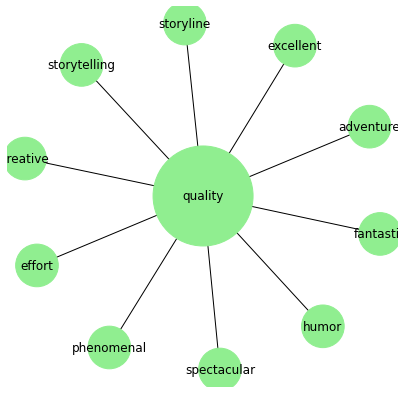

In [156]:
import networkx as nx
import numpy as np

                
g = nx.Graph()
g = nx.from_pandas_edgelist(df_topic1, source='Item',target='Topic')

G_symmetric = nx.Graph()
G_symmetric = nx.from_pandas_edgelist(df_topic1, source='Item',target='Topic')
# print(nx.info(G_symmetric))

pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)


node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]

pr = nx.pagerank(g)
# print(nsize)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize -min(nsize)/ (max(nsize) - min(nsize)))


plt.figure(figsize=(7,7))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
#                  node_color=node_color,
                 node_size=node_size,
                 node_color = 'lightgreen')
plt.savefig('quality.png',dpi=200 ,facecolor='#eeeeee')
plt.axis('off');